# 1. Cleaning Data

## Here we are investigating the data on Drone attacks that have happened in Pakistan since 2004.

### Importing required libraries and reading the Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv("/Users/harshitsrivastava/Desktop/Drone attacks in Pakistan/PakistanDroneAttacks.csv")

# Removing the last row as it contained junk values
df = df.drop(df.index[[403, 404]])

# Dropiing the Axes that are not required
df=df.drop(['Special Mention (Site)', 'References','Time'], axis=1)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Location :  0
City :  0
Province :  0
No of Strike :  0
Al-Qaeda :  307
Taliban :  264
Civilians Min :  68
Civilians Max :  45
Foreigners Min :  312
Foreigners Max :  265
Total Died Min :  97
Total Died Mix :  3
Injured Min :  259
Injured Max :  128
Women/Children   :  68
Comments :  228
Longitude :  0
Latitude :  0
Temperature(C) :  2
Temperature(F) :  2


### 1.1. Missing Values


Removing NaN values from columns and replacing it with appropriate values:
1. Time: NaN -> 00:00 (Setting un-recorded time to 12 AM)
2. Al-Qaeda TO Injured_Min: NaN -> 0 (Setting un-recorded deaths to 0)
3. Women/Children: NaN -> N (Setting un-recorded Women/Children involvement to No)
4. Location (City Name) NaN -> when location not recorded (Lattitude and longitude still present)

We will deal with the null values of 'Comments' column later on

In [3]:
def filling_nan(data):
    
    # Initializing 'col' which stores the Column names of the columns whose null values need to be filled by 0
    col = ['Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
           'Total Died Min', 'Total Died Mix', 'Injured Min', 'Injured Max']
    
    data[col] = data[col].fillna(0)                                  # Filling the above columns with 0
    data['Women/Children  '] = data['Women/Children  '].fillna('N')  # Filling the Women/Children column's missing values with 'N'
    data['Temperature(C)'] = data['Temperature(C)'].fillna(data['Temperature(C)'].mean())
    data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].mean())
    
    return data

In [19]:
data = filling_nan(df)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Location :  0
City :  0
Province :  0
No of Strike :  0
Al-Qaeda :  0
Taliban :  0
Civilians Min :  0
Civilians Max :  0
Foreigners Min :  0
Foreigners Max :  0
Total Died Min :  0
Total Died Mix :  0
Injured Min :  0
Injured Max :  0
Women/Children   :  0
Comments :  228
Longitude :  0
Latitude :  0
Temperature(C) :  0
Temperature(F) :  0
DateTime :  0
Terrorists :  0
Civilians :  0
Injured :  0
Total Died :  0
Foreigners :  0
Innocents :  0
Accuracy :  0


### 1.2 Changing to Date-Time format

Merging the Date and Time columns and saving the data in date-time format for ease of use

In [25]:
def dt(data):
    data['DateTime'] = pd.Series()
    for i in range(0, len(data.Date)):
        
        # Converting to date-time format
        frame = data['Date'][i]
        data['DateTime'][i] =  datetime.datetime.strptime(frame, '%A, %B %d, %Y')
    
    return data

In [26]:
data = dt(data)

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 1.3 Marking terrorists and civilians

In the dataset, there are separate columns for no. of Al-Qaeda personnel killed, no. of Talibani killed, minimum no. of civilians killed etc. We want to add a new column marking the count of a terrorist killed (Al-Qaeda or Taliban) and marking the counts of civilians killed (civilians, foreigners etc.)

In [27]:
data['Terrorists'] = data['Al-Qaeda'] + data['Taliban']                   # Adding Taliban and Al-Qaeda personnel killed
data['Civilians'] = (data['Civilians Min'] + data['Civilians Max'])/2     # Taking average of Max and Min Civilians killed
data['Civilians'] = np.ceil(data['Civilians'])                            # Rounding up the average
data['Injured'] = (data['Injured Min'] + data['Injured Max'])/2           # Taking average of Max and Min Civilians injured
data['Injured'] = np.ceil(data['Injured'])                                # Rounding up the average
data['Total Died'] = (data['Total Died Min'] + data['Total Died Mix'])/2           # Taking average of Max and Min Civilians injured
data['Total Died'] = np.ceil(data['Total Died'])
data['Foreigners'] = (data['Foreigners Min'] + data['Foreigners Max'])/2  # Taking average of Max and Min Foreigners killed
data['Foreigners'] = np.ceil(data['Foreigners'])                          # Rounding up the average

data['Innocents'] = data['Total Died'] - data['Terrorists']                # Marking all the non-terrorists killed



# In some observations, the Total Died was not calculated accurately and there were negative values representing the 
# number of people killed. In those cases, we used different method to calculate the Civilian Casualties
for i in range(0, len(data.Innocents)):
    if data['Innocents'][i] <0:
        data['Innocents'][i] = data['Civilians'][i] + data['Foreigners'][i]
        
    # Changing the Labels in 'Women/Children' column to Binary values
    if data['Women/Children  '][i] == 'N':
        data['Women/Children  '][i] = 0
    elif data['Women/Children  '][i] == 'Y':
        data['Women/Children  '][i] = 1

# Accuracy is the ratio of terrorists killed to the total number of people killed in a drone strike
data['Accuracy'] = (data['Terrorists'])/(data['Terrorists'] + data['Innocents'])
data['Accuracy'] = data['Accuracy'].fillna(0)

# Removing the columns that are not required for further analysis, replacement have been made for some of these columns
data = data.drop(['Date', 'Province', 'Civilians Min', 'Civilians Max', 'Foreigners Min',
                  'Foreigners Max', 'Total Died Min', 'Total Died Mix', 'Injured Min', 'Injured Max', 
                 'Temperature(C)', 'Temperature(F)'], axis=1)

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
data.head()

,S#,Location,City,No of Strike,Al-Qaeda,Taliban,Women/Children,Comments,Longitude,Latitude,DateTime,Terrorists,Civilians,Injured,Total Died,Foreigners,Innocents,Accuracy
0,1.0,Near Wana,South Waziristan,1.0,0.0,1.0,0,Village in Wana,69.9000,33.0333,2004-06-18 00:00:00,1.0,2.0,0.0,3.0,0.0,2.0,0.333333
1,2.0,Mir Ali (Near Afghan Border),North Waziristan,1.0,1.0,0.0,0,Civilian killied was Samiullah Khan who was a ...,70.1455,32.9746,2005-05-08 00:00:00,1.0,1.0,0.0,1.0,0.0,0.0,1.000000
2,3.0,Haisori- Miran Shah,North Waziristan,1.0,1.0,0.0,0,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,70.1455,32.9746,2005-12-01 00:00:00,1.0,1.0,1.0,3.0,2.0,2.0,0.333333
3,4.0,Saidgai village- 115km north of Wana,North Waziristan,1.0,0.0,0.0,0,NaN,70.1455,32.9746,2006-01-06 00:00:00,0.0,0.0,1.0,2.0,0.0,2.0,0.000000
4,5.0,Damadola Village,Bajaur Agency,1.0,0.0,0.0,1,Masood Khan house was among those bombed. Want...,71.5000,34.6833,2006-01-13 00:00:00,0.0,9.0,1.0,9.0,0.0,9.0,0.000000


In [29]:
# Creating new columns for Year, Day of week and Month from the given Date-Time format
data['Year'] = np.nan
data['Weekday'] = np.nan
data['Month'] = np.nan

# Extracting the Year of attack, Day of attack and the month of Attack
for i in range(0, len(data.Year)):
    data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
    data.loc[:,'Weekday'][i] = data['DateTime'][i].weekday()
    data.loc[:,'Month'][i] = data['DateTime'][i].month

# Converting Year and Weekday values from float to int
data['Year'] = data['Year'].astype("int")
data['Weekday'] = data['Weekday'].astype("int")
    
# Grouping the new column by the Year, Weekday & Month and corresponding Drone Attacks
by_year = data.groupby(['Year'])['No of Strike'].sum()
by_weekday = data.groupby(['Weekday'])['No of Strike'].sum()
by_month = data.groupby(['Month'])['No of Strike'].sum()


/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### 1.4 Cleaning the 'City' column by removing inconsistent values

In [30]:
data['City'] = data['City'].replace('South waziristan', 'South Waziristan')
data['City'] = data['City'].replace('south Waziristan', 'South Waziristan')
data['City'] = data['City'].replace('south waziristan', 'South Waziristan')
data['City'] = data['City'].replace('Lower Kurram Agency', 'Kurram')
data['City'] = data['City'].replace('Kurram Agency', 'Kurram')
data['City'] = data['City'].replace('Khyber Agency', 'Khyber')
data['City'] = data['City'].replace('Hungu', 'Hangu')

In [31]:
data.City.unique()

array(['South Waziristan', 'North Waziristan', 'Bajaur  Agency', 'Bannu',
       'Khyber', 'Kurram', 'Orakzai', 'Hangu', 'Dalbandin'], dtype=object)

### 1.5 Creating Year-wise dataset
Here, we are taking the important features, grouping them by year and creating a new DataFrame

In [33]:
data_byyear = pd.DataFrame()
data_byyear['Terrorists'] = data.groupby(['Year'])['Terrorists'].sum()
data_byyear['Innocents'] = data.groupby(['Year'])['Innocents'].sum()
data_byyear['Injured'] = data.groupby(['Year'])['Injured'].sum()
data_byyear['No of strikes'] = data.groupby(['Year'])['No of Strike'].sum()
data_byyear['Accuracy'] = data.groupby(['Year'])['Accuracy'].mean()
data_byyear['Total Died'] = data.groupby(['Year'])['Total Died'].sum()
data_byyear['Avg Innocents Killed'] = data.groupby(['Year'])['Innocents'].mean()

In [34]:
data_byyear

,Terrorists,Innocents,Injured,No of strikes,Accuracy,Total Died,Avg Innocents Killed
Year,,,,,,,
2004,1.0,2.0,0.0,1.0,0.333333,3.0,2.000000
2005,2.0,2.0,1.0,2.0,0.666667,4.0,1.000000
2006,0.0,52.0,2.0,3.0,0.000000,52.0,17.333333
2007,0.0,36.0,19.0,6.0,0.000000,36.0,9.000000
2008,36.0,270.0,113.0,55.0,0.075241,301.0,7.500000
2009,125.0,389.0,225.0,57.0,0.259694,495.0,7.780000
2010,111.0,701.0,285.0,123.0,0.122750,806.0,6.431193
2011,60.0,431.0,95.0,79.0,0.104892,479.0,5.904110
2012,87.0,204.0,64.0,105.0,0.231209,268.0,4.000000


### 1.6 Creating new DataFrame day-wise

Here we are creating new Data frame 'datadate' where each row will represent one day. The days on which drone strikes took place will have values in the corresponding columns (Terrorists, Civilians, Injured etc.). All the other rows will be filled with 0

In [15]:
# Initializing start-date and end-date
start_date = datetime.date(2004,1,1)
end_date= datetime.date(2017,12,31)

# Creating object containing all the dates from 2004 to 2017
days = pd.date_range(start_date, end_date)

# Making the object the index of the new DataFrame
datadate = pd.DataFrame(index=days)
datadate.index.name='Date'

datadate['Terrorists']=np.nan
datadate['Civilians']=np.nan
datadate['Injured']=np.nan
datadate['Foreigners']=np.nan
datadate['Month']=np.nan
datadate['Year']=np.nan
datadate['Strikes']=np.nan

# Storing Month and Year values in new columns for future use
for i in range(len(datadate)):
    datadate['Month']=days.strftime("%B")
    datadate['Year']=days.year

# Filling the new DataFrame with values. These values come from the dates in which Drone Attack took place.
# All remaining dates will contain nan
for i in range(len(data)):
    if(data['DateTime'][i] in datadate.index):
        
        datadate['Strikes'][data['DateTime'][i]]=data['No of Strike'][i]    
        datadate['Terrorists'][data['DateTime'][i]]=data['Terrorists'][i]
        datadate['Civilians'][data['DateTime'][i]]=data['Civilians'][i]
        datadate['Injured'][data['DateTime'][i]]=data['Injured'][i]
        datadate['Foreigners'][data['DateTime'][i]]=data['Foreigners'][i]

# Replacing nan values with 0
datadate = datadate.fillna(0)


/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: Se

In [175]:
datadate.head()

,Terrorists,Civilians,Injured,Foreigners,Month,Year,Strikes
Date,,,,,,,
2004-01-01,0.0,0.0,0.0,0.0,January,2004,0.0
2004-01-02,0.0,0.0,0.0,0.0,January,2004,0.0
2004-01-03,0.0,0.0,0.0,0.0,January,2004,0.0
2004-01-04,0.0,0.0,0.0,0.0,January,2004,0.0
2004-01-05,0.0,0.0,0.0,0.0,January,2004,0.0


In [37]:
S_Waziristan = data[(data.City == 'South Waziristan')]
N_Waziristan = data[(data.City == 'North Waziristan')]

### 1.7 Exporting the Processed data

In [41]:
%store datadate
%store data_byyear

# Converting datadate to a new CSV as the creation of that DataFrame takes a long time
datadate.to_csv("Intermediate_Drone_Strike.csv")

Stored 'S_Waziristan' (DataFrame)
Stored 'N_Waziristan' (DataFrame)
Stored 'datadate' (DataFrame)
Stored 'data_byyear' (DataFrame)


# 2. Exploratory Data Analysis

## 2.1 Visualizing the Data

### 2.1.1 Number of Drone Attacks over the Years

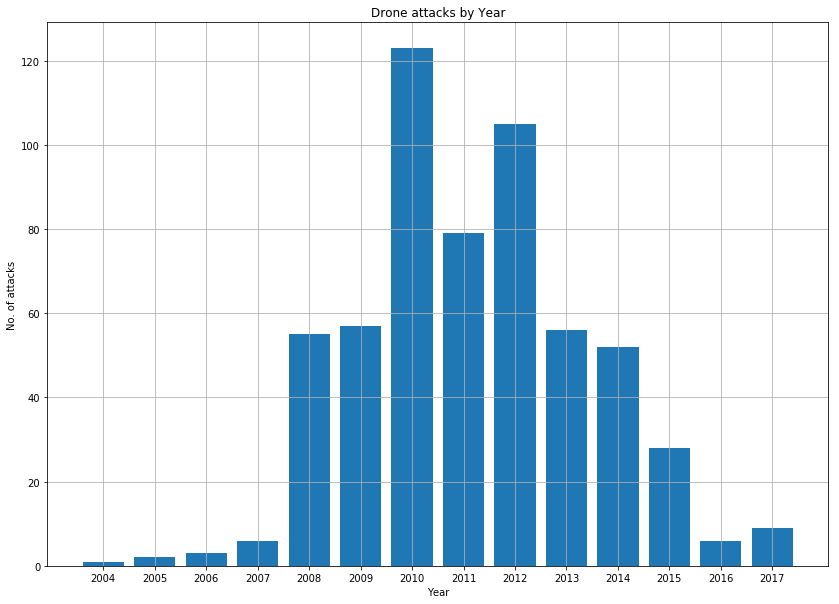

In [104]:
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(left=list(by_year.keys()), height=by_year.values)
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Year")
plt.xticks(list(by_year.keys()))
plt.grid()
plt.show()

### 2.1.2 Number of Drone Attacks by Day of a week

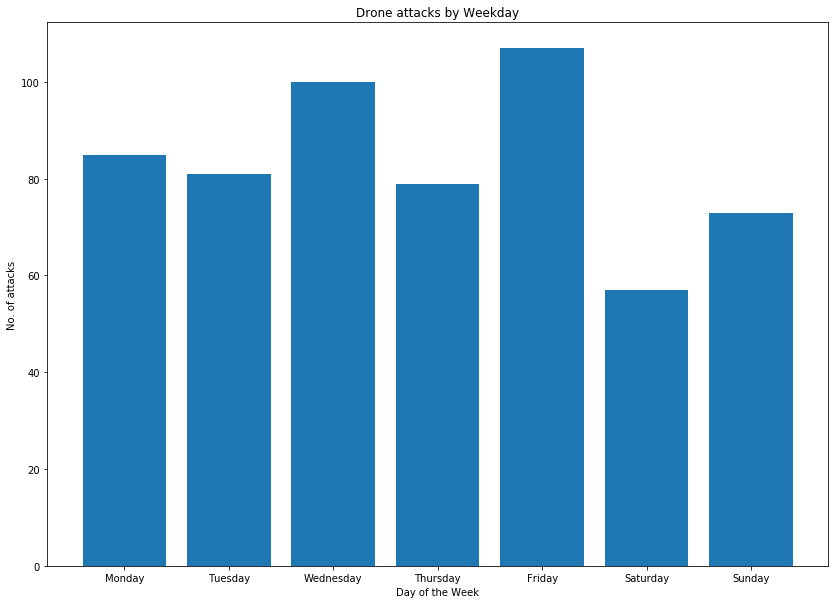

In [24]:
fig2 = plt.figure(figsize=(14, 10))
fig2 = plt.bar(left=list(by_weekday.keys()), height=by_weekday.values)
plt.xlabel("Day of the Week")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Weekday")
plt.xticks(range(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

### 2.1.3 Number of Drone Attacks by Month

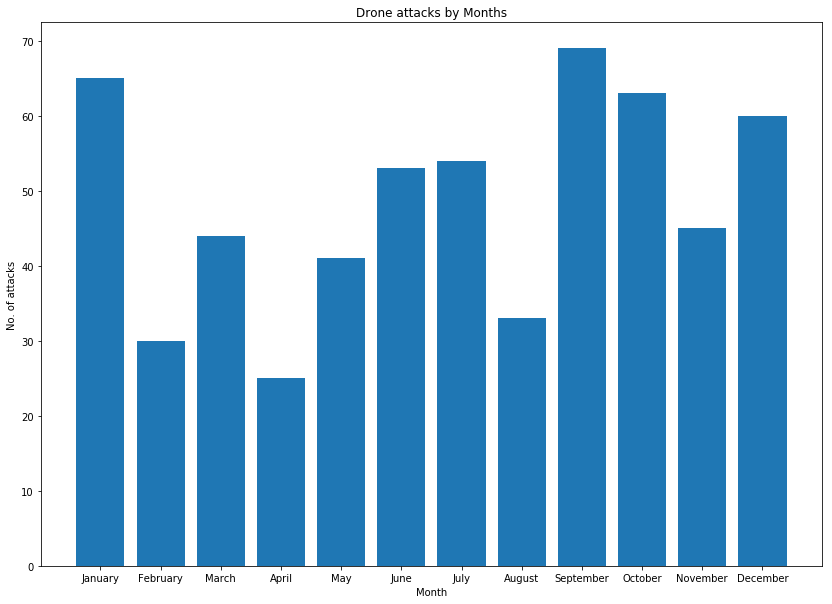

In [25]:
fig3 = plt.figure(figsize=(14, 10))
fig3 = plt.bar(left=list(by_month.keys()), height=by_month.values)
plt.xlabel("Month")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Months")
plt.xticks(range(1,13), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.show()

### 2.1.4 Precision of Drone Strikes over the Years

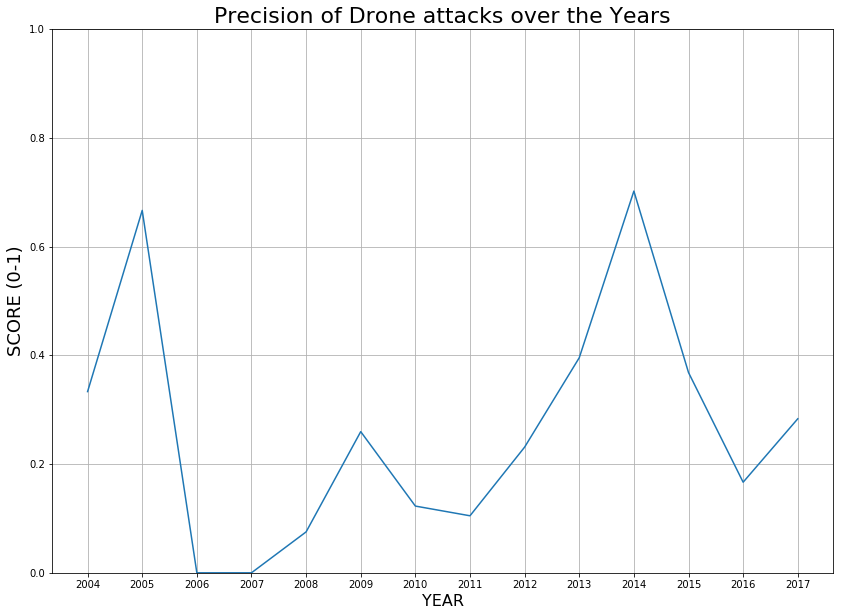

In [42]:
"""Precision is being calculated by taking the number of Terrorists killed and dividing it by the total number 
   of people killed (including 'Civilians' and 'Foreigners') """

fig = plt.figure(figsize=(14, 10))
fig = plt.plot(data_byyear.Accuracy.keys(), data_byyear.Accuracy)
plt.xlabel("YEAR", fontsize=16)
plt.ylabel("SCORE (0-1)", fontsize=18)
plt.title("Precision of Drone attacks over the Years", fontsize=22)
plt.xticks(range(2004, 2018))
plt.ylim(0, 1)
plt.grid()
plt.show()

### 2.1.5 Trend of Civilians and Terrorists killed along with people Injured

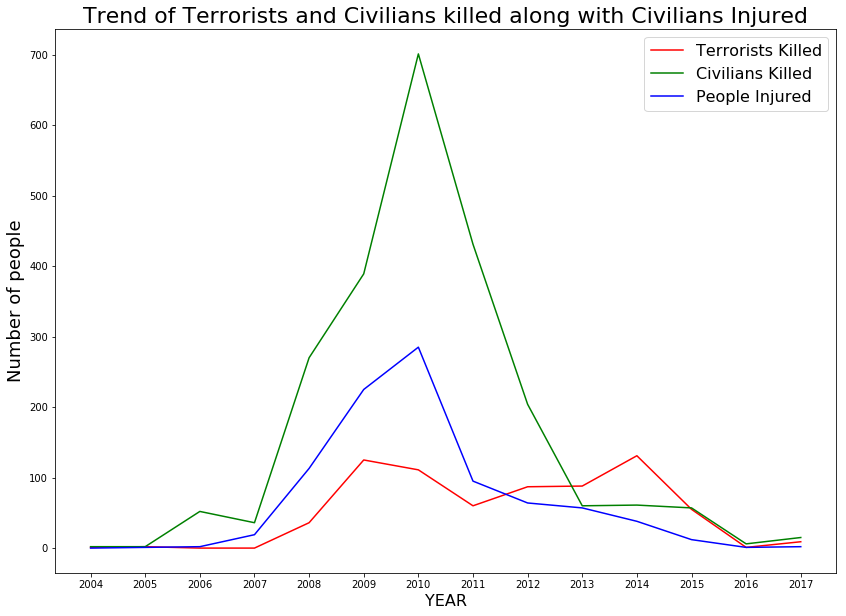

In [27]:
fig = plt.figure(figsize=(14, 10))
x = data_byyear.Accuracy.keys()

plt.plot(x, data_byyear.Terrorists, color='r', label = 'Terrorists Killed')
plt.plot(x, data_byyear.Innocents, color='g', label = 'Civilians Killed')
plt.plot(x, data_byyear.Injured, color='b', label = 'People Injured')
plt.xticks(range(2004, 2018))
plt.xlabel("YEAR", fontsize=16)
plt.ylabel("Number of people", fontsize=18)
plt.title("Trend of Terrorists and Civilians killed along with Civilians Injured", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

### 2.1.6 Al-Qaeda vs Taliban and Bush vs Obama

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


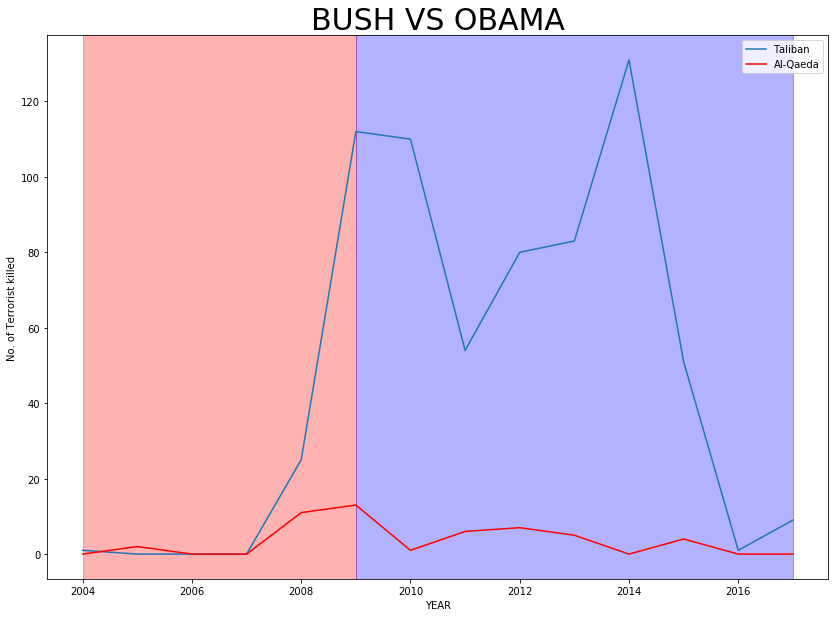

,0,Taliban,Al-Qaeda
Year,,,
2004.0,1,1,0
2005.0,2,0,2
2006.0,3,0,0
2007.0,4,0,0
2008.0,36,25,11
2009.0,50,112,13
2010.0,109,110,1
2011.0,73,54,6
2012.0,51,80,7


In [169]:
def timeperiodyearTA(data):
    
    a1=[]
    data['Year'] = np.nan
    data['Weekday'] = np.nan
    data['Month'] = np.nan

    for i in range(0, 403):
        data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
    
# Grouping the new column by the Year, Weekday & Month and corresponding Drone Attacks
    by_year = data.groupby('Year').size()
    df7 = pd.DataFrame(by_year)
    timeyear = [2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0]
    df7['Taliban'] = 0
    df7['Al-Qaeda'] = 0
    for i in range(0, 403):
            for x in range(len(timeyear)):
                if (data.loc[:,'Year'][i] == timeyear[x]):
                    df7['Taliban'][timeyear[x]] = df7['Taliban'][timeyear[x]] + data['Taliban'][i]
                    df7['Al-Qaeda'][timeyear[x]] = df7['Al-Qaeda'][timeyear[x]] + data['Al-Qaeda'][i]
    x = df7.index.values
    y1= df7['Taliban']
    y2= df7['Al-Qaeda']
    fig1= plt.figure(figsize=(14, 10))
    plt.plot(x,y1)
    plt.plot(x,y2,color="red")
    plt.ylabel("No. of Terrorist killed")
    plt.title("BUSH VS OBAMA", fontsize = 30)
    plt.xlabel("YEAR")
    plt.legend()
    plt.axvspan(2004, 2009, color='red', alpha=0.3)
    plt.axvspan(2009, 2017, color='blue', alpha=0.3)
    plt.show()
    return df7
timeperiodyearTA(df)

## 2.2 Plotting the Drone Attacks on the Map

In [174]:
def areaTA(data,z):
    
    b=[]
    c=[]
    d=[]
    for i in range(len(data.index)):
        if (data['Taliban'][i].any() != 0.0):
            b.append(data['Location'][i])
            c.append(data['Longitude'][i])
            d.append(data['Latitude'][i])
    df2 = pd.DataFrame(b)
    df2.columns=['Taliban']
    df2['Longitude'] = pd.DataFrame(c)
    df2['Latitude'] = pd.DataFrame(d)
    df3 = df2.drop_duplicates()
    e=[]
    f=[]
    g=[]
    for i in range(len(data.index)):
        if (data['Al-Qaeda'][i].any() != 0.0):
            e.append(data['Location'][i])
            f.append(data['Longitude'][i])
            g.append(data['Latitude'][i])
    df4 = pd.DataFrame(e)
    df4.columns=['Al-Qaeda']
    
    df4['Longitude'] = pd.DataFrame(f)
    df4['Latitude'] = pd.DataFrame(g)
    #df2.columns=['Al-Qaeda']
    #df2.sort_values('Taliban').drop_duplicates('Taliban')
    df5 = df4.drop_duplicates()
    if (z==1):
        return df3
    else:
        return df4
areaTA(df,1)
    

def Mapping(df):
    import folium
    dfmap1=areaTA(df,1)
    dfmap0=areaTA(df,0)
    
    subset1 = dfmap1[['Latitude', 'Longitude']]
    tuples1 = [tuple(x) for x in subset1.values]

    subset0 = dfmap0[['Latitude', 'Longitude']]
    tuples0 = [tuple(x) for x in subset0.values]
    c1 = [x for x in tuples1 if not any(isinstance(i, float) and np.isnan(i) for i in x)]
    c0 = [x for x in tuples0 if not any(isinstance(i, float) and np.isnan(i) for i in x)]
    mapit = folium.Map(location=[32.9,70.1],zoom_start = 8)
    for coord in c1:
        folium.Marker( location=[ coord[0], coord[1] ],icon=folium.Icon(color='red',icon='info-sign')).add_to( mapit )
    for coord in c0:
        folium.Marker( location=[ coord[0], coord[1] ],icon=folium.Icon(color='green')).add_to( mapit )

    mapit.save( 'map.html')
    return mapit
Mapping(df)

In the above map, the Green labels indicate the Drone Strikes in which Al-Qaeda personnels were killed and the Red labels indicate the Drone Strikes in which Talibani got killed. The region in which the Drone Strikes happened were very close to each other and therefore there is a lot of overlap in the labels.

## 2.3 Visualizing the important words commented on every Drone Strike

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


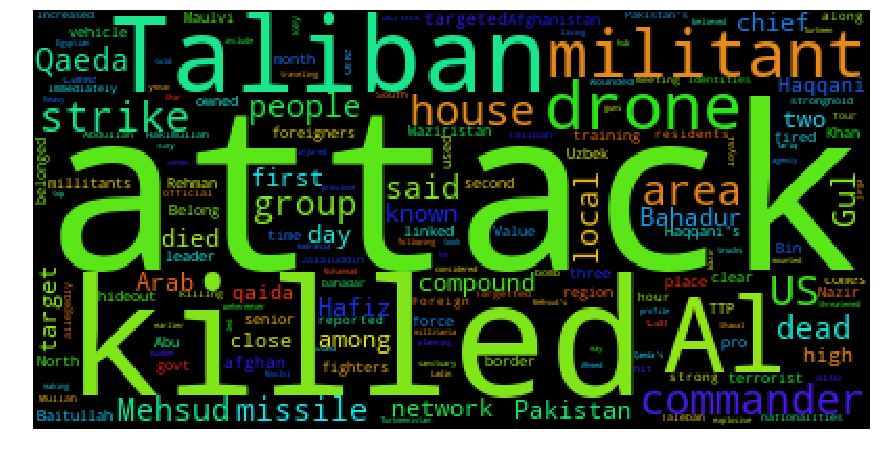

In [43]:
# Using Wordcloud library to visualize the high-frequency words (https://github.com/amueller/word_cloud)
from wordcloud import WordCloud
a=[]

# Ignoring the Null Values
for i in range(len(data)):
    data['Comments'][i]=str(data['Comments'][i])
    if (data['Comments'][i]!=np.nan):
        a.append(data['Comments'][i])
        
a = [x for x in a if str(x) != 'nan']
        
# Generating the picture using WordCloud 
wordcloud = WordCloud().generate(' '.join(a))

# Plotting the image generated
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In the above figure, the size of each figure depends on the frequency by which that word occurs in the Comments. Each word that is big enough to be read tells an interesting story about it. Words like Taliban and Al-Qaeda are big enough to be read whereas words like 'Haqqani-Network' is quite small. This is also true in the region which is dominated by Talibani followed by Al-Qaeda group members but there are also some members of the 'Haqqani-Network' operating in that region who have declared their fight against the US-led NATO Forces

# 3.  Time-Series Forecasting of Number of Drone Strikes

## 3.1 ARMA Model

### 3.1.1 Autocorrelation and Partial Autocorrelation plot of Time-Series

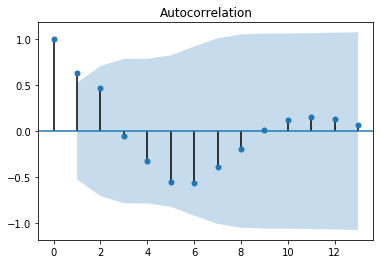

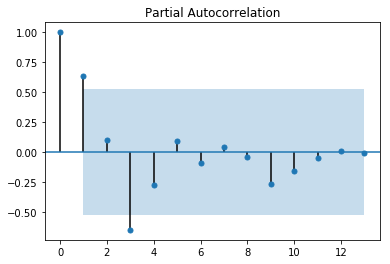

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

N_Strikes = data_byyear['No of strikes']

fig = plt.figure(figsize=[24, 20])
fig = plot_acf(N_Strikes)          # Plotting Auto-correlation function
fig = plot_pacf(N_Strikes)         # Plotting Partial auto-correlation function
plt.show()

From ACF and PACF plot, we are inclined towards using AR (p) = 3 and MA (q) = 1 

### 3.1.2 Fitting the ARMA model

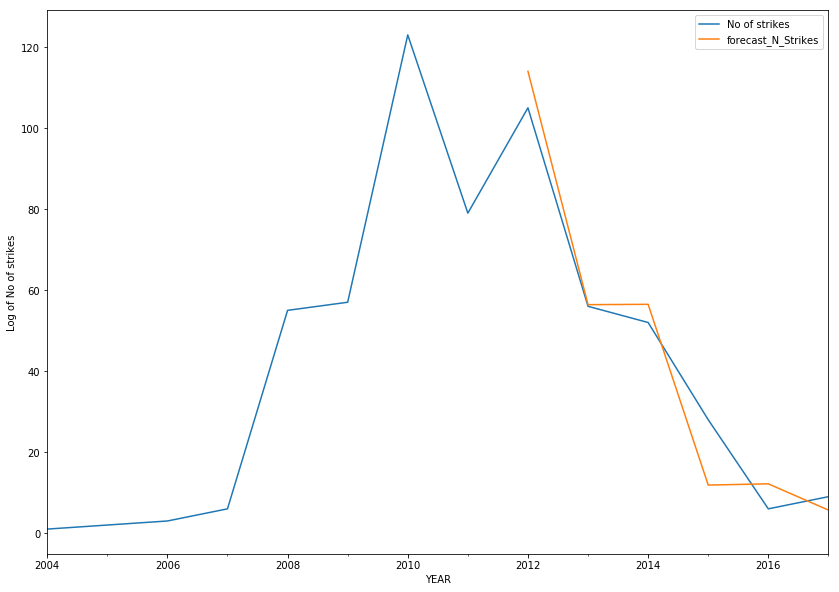

In [111]:
from statsmodels.tsa import arima_model

data_byyear.index = pd.to_datetime(data_byyear.index, format='%Y')

# Using p=3 and q=1, building the ARMA model
npdf = data_byyear['No of strikes'].astype(float)
results = arima_model.ARMA(npdf,(3, 1)).fit()
print (results)

# Forecasting using the ARMA model defined above
data_byyear['forecast_N_Strikes'] = results.predict(start='2012-01-01', end='2017-01-01', dynamic= False) 

# Plotting the forecast along with the actual data
data_byyear[['No of strikes', 'forecast_N_Strikes']].plot(figsize=(14, 10))
plt.xlabel('YEAR')
plt.ylabel('Log of No of strikes')
plt.show()

### 3.1.3 Calculating Mean Absolute Error and Mean Forecast Error

In [58]:
from sklearn.metrics import mean_absolute_error

# Creating Series of Actual Values
N_Strikes = data_byyear['No of strikes']
N_Strikes_sub = N_Strikes.loc['2011-01-01': '2017-01-01']

forecast = results.predict(start='2011-01-01', end='2017-01-01', dynamic= True)

# Mean Absolute Error
MAE = mean_absolute_error(N_Strikes_sub, forecast)
print ("Mean Absolute Error (MAE): {}".format(MAE))

# Mean Forecast Error
forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
MFE = (sum(forecast_error))/len(N_Strikes)
print ("Mean Forecast Error (MFE): {}".format(MFE))

Mean Absolute Error (MAE): 8.8642430793
Mean Forecast Error (MFE): 2.02236334054


The Mean Absolute Error and Mean Forecast Error seems to be quite low given the size of the Time-Series. We try to improve the score by making the Time-series stationary and then fitting the model.

## 3.2 Making the Time-Series Stationary

### 3.2.1 Visualizing the Time-Series and plotting mean, std and Log( )

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  import sys
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


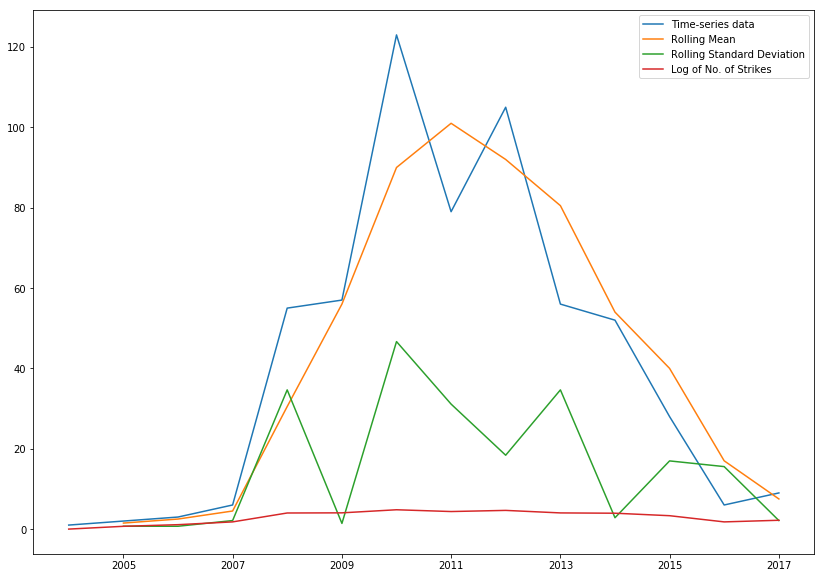

In [176]:
plt.figure(figsize=(14, 10))

# Plotting Time-series
plt.plot(data_byyear['No of strikes'], label= 'Time-series data')

# Plotting Rolling Mean
rollmean = pd.rolling_mean(data_byyear['No of strikes'], window = 2)
plt.plot(rollmean, label = 'Rolling Mean')

# Plotting Standard Deviation
std_dev = pd.rolling_std(data_byyear['No of strikes'], window = 2)
plt.plot(std_dev, label = 'Rolling Standard Deviation')

# Plotting Log( ) function of Time-Series
data_byyear['Log_No of strikes'] = np.log(data_byyear['No of strikes'])
plt.plot(data_byyear['Log_No of strikes'], label = 'Log of No. of Strikes')

plt.legend()

### 3.2.2 Visualizing the Log( ) function and its rolling mean

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


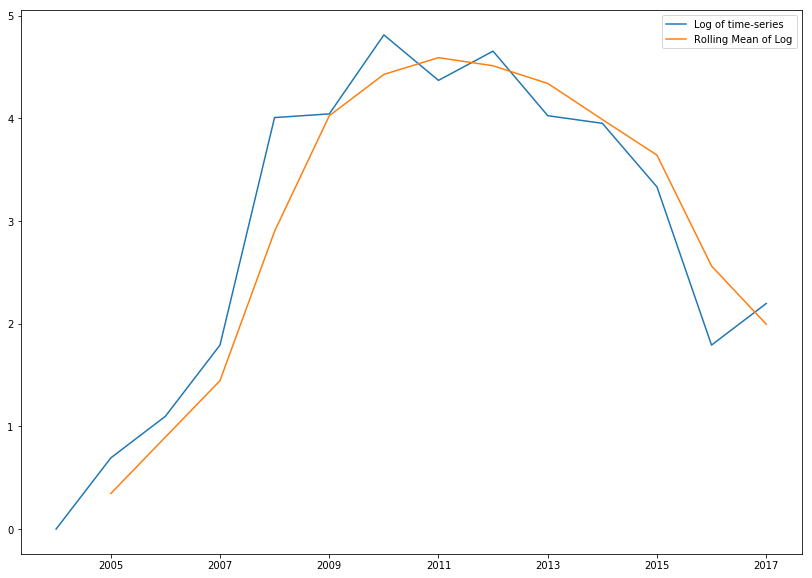

In [177]:
### Plotting Log of the 'No. of Strikes'

mov_mean = pd.rolling_mean(data_byyear['Log_No of strikes'], window = 2)
plt.figure(figsize=(14, 10))
plt.plot(data_byyear['Log_No of strikes'], label = 'Log of time-series')
plt.plot(mov_mean, label = 'Rolling Mean of Log')
plt.legend()

### 3.2.3 Visualizing the Second Difference of the Log function

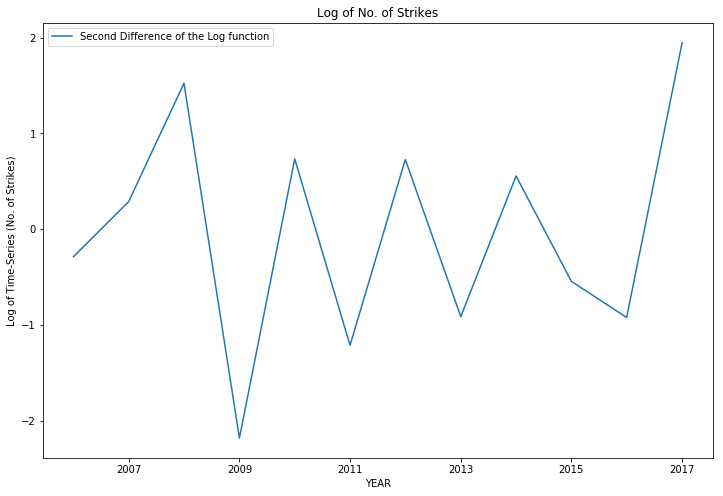

In [178]:
# Storing the Log of Time-series in a new variable
ts_log = data_byyear['Log_No of strikes']

ts_log_diff1 = ts_log - ts_log.shift()
data_byyear['First Difference'] = ts_log_diff1
ts_log_diff2 = ts_log_diff1 - ts_log_diff1.shift()
data_byyear['Second Difference'] = ts_log_diff2
data_byyear['Second Difference'].dropna(inplace=True)
plt.figure(figsize=(12, 8))
plt.ylabel('Log of Time-Series (No. of Strikes)')
plt.xlabel('YEAR')
plt.title('Log of No. of Strikes')
plt.plot(ts_log_diff2, label = 'Second Difference of the Log function')
plt.legend()

In [107]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(data_byyear['Second Difference'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -3.215811
p-value                        0.019088
#Lags Used                     2.000000
Number of Observations Used    9.000000
Critical Value (5%)           -3.289881
Critical Value (1%)           -4.473135
Critical Value (10%)          -2.772382
dtype: float64


The plot of the changed Time-Series along with the results of ADF Test indicate that the Time-Series is now stationary

In [93]:
from statsmodels.stats.stattools import durbin_watson
print "Durbin-Watson statistic of stationary time-series ", durbin_watson(data_byyear['Second Difference'])

# The Durbin-Watson statistic implies a strong auto-correlation in the errors

Durbin-Watson statistic of stationary time-series  2.90393546199


Durbin-Watson statistic close to 2 implies that the One-Dimensional Time-Series has no evidence of serial correlation

### 3.2.4 Plotting the Autocorrelation and Partial Autocorrelation plots

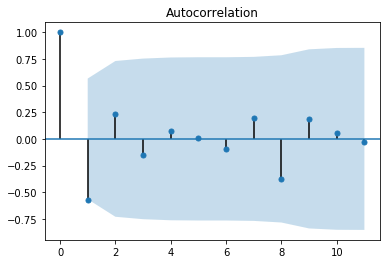

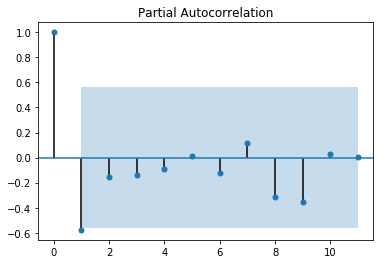

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=[24, 20])
fig = plot_acf(data_byyear['Second Difference'])          # Plotting Auto-correlation function
fig = plot_pacf(data_byyear['Second Difference'])         # Plotting Partial auto-correlation function
plt.show()

### 3.2.5 Fitting the ARMA model by taking p=1 and q-0

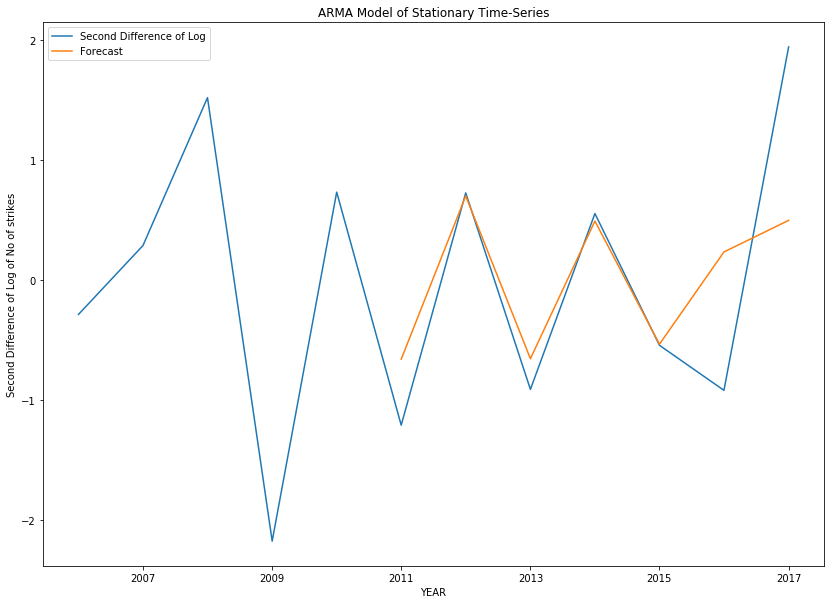

In [179]:
# Using p = 1 and q = 0, building the ARMA model

npdf = data_byyear['Second Difference'].astype(float)
results = arima_model.ARMA(npdf,(1, 0)).fit()

# Creating Series of Actual Values
N_Strikes = data_byyear['Second Difference']
N_Strikes_sub = N_Strikes.loc['2011-01-01': '2017-01-01']

forecast = results.predict(start='2011-01-01', end='2017-01-01', dynamic= False) 

# Plotting the forecast along with the actual data
plt.figure(figsize=(14, 10))
plt.plot(data_byyear['Second Difference'], label = 'Second Difference of Log')
plt.plot(forecast, label = 'Forecast')
plt.xlabel('YEAR')
plt.ylabel('Second Difference of Log of No of strikes')
plt.title('ARMA Model of Stationary Time-Series')
plt.legend()
plt.show()

### 3.2.6 Calculating the MAE and MFE of new Time-Series

In [153]:
# Using p = 1 and q = 0, building the ARMA model
npdf = data_byyear['Second Difference'].astype(float)
results = arima_model.ARMA(npdf,(1, 0)).fit()

# Creating Series of Actual Values
N_Strikes = data_byyear['Second Difference']
N_Strikes_sub = N_Strikes.loc['2011-01-01': '2017-01-01']

forecast = results.predict(start='2011-01-01', end='2017-01-01', dynamic= False) 

# Mean Absolute Error
MAE = mean_absolute_error(N_Strikes_sub, forecast)
print ("Mean Absolute Error (MAE): {}".format(MAE))

# Mean Forecast Error
forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
MFE = (sum(forecast_error))/len(N_Strikes)
print ("Mean Forecast Error (MFE): {}".format(MFE))

Mean Absolute Error (MAE): 0.500999022518
Mean Forecast Error (MFE): -0.0361537701345


### 3.2.7 Visualizing the distribution of Residuals

NormaltestResult(statistic=3.6984915776956213, pvalue=0.15735580107020461)


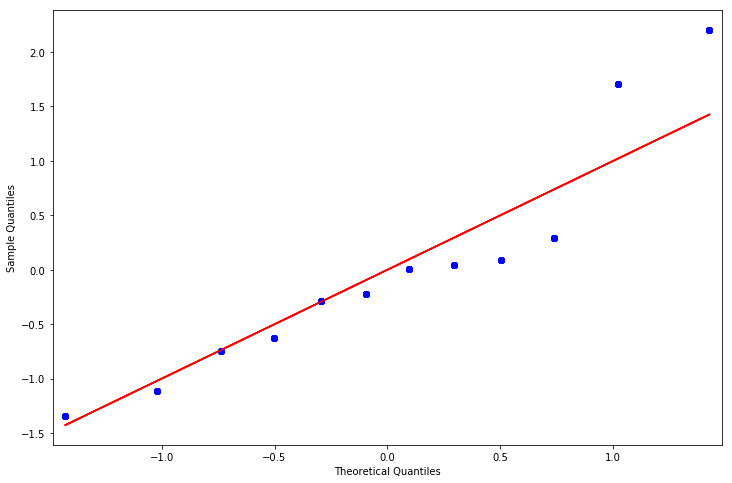

In [180]:
from scipy import stats
from statsmodels.graphics.api import qqplot

# Printing the Normal Test results to check whether residuals come from a normal distribution
resid = results.resid
print(stats.normaltest(resid))

# Contructing qq-plot of residuals 
fig = plt.figure(figsize=(12,8))
qqplot(resid, line='s', ax=ax, fit=True)

### Following cell was used to find the best score for Non-Stationary ARMA model to confirm our choice of p and q values

In [151]:
### Generating MAE and MFE for multiple parameters in ARMA model

#data_byyear.index = pd.to_datetime(data_byyear.index, format='%Y')

for j in range(0, 5):
    for k in range(0, 5):
        try:
            # Using p=2 and q=0, building the ARMA model
            npdf = data_byyear['No of strikes'].astype(float)
            results = arima_model.ARMA(npdf,(k, j)).fit()
            #print (results)
        except ValueError:
            continue

        # Creating Series of Actual Values
        N_Strikes = data_byyear['No of strikes']
        N_Strikes_sub = N_Strikes.loc['2011-01-01': '2017-01-01']

        forecast = results.predict(start='2011-01-01', end='2017-01-01', dynamic= True)

        # Mean Absolute Error
        MAE = mean_absolute_error(N_Strikes_sub, forecast)
        print ("Mean Absolute Error (MAE): {}".format(MAE), "p:", k, "q:", j)

        # Mean Forecast Error
        forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
        MFE = (sum(forecast_error))/len(N_Strikes)
        print ("Mean Forecast Error (MFE): {}".format(MFE), "p:", k, "q:", j)

('Mean Absolute Error (MAE): 29.6326530612', 'p:', 0, 'q:', 0)
('Mean Forecast Error (MFE): 3.14285714286', 'p:', 0, 'q:', 0)
('Mean Absolute Error (MAE): 19.250376921', 'p:', 1, 'q:', 0)
('Mean Forecast Error (MFE): -5.25946208194', 'p:', 1, 'q:', 0)
('Mean Absolute Error (MAE): 22.1864774791', 'p:', 2, 'q:', 0)
('Mean Forecast Error (MFE): -7.31754421003', 'p:', 2, 'q:', 0)
('Mean Absolute Error (MAE): 11.0725965518', 'p:', 3, 'q:', 0)
('Mean Forecast Error (MFE): -1.69644078622', 'p:', 3, 'q:', 0)
('Mean Absolute Error (MAE): 25.477268971', 'p:', 0, 'q:', 1)
('Mean Forecast Error (MFE): 1.63158651553', 'p:', 0, 'q:', 1)
('Mean Absolute Error (MAE): 20.5512256945', 'p:', 1, 'q:', 1)
('Mean Forecast Error (MFE): -6.07437716527', 'p:', 1, 'q:', 1)
('Mean Absolute Error (MAE): 23.838249576', 'p:', 2, 'q:', 1)
('Mean Forecast Error (MFE): -8.98245474695', 'p:', 2, 'q:', 1)
('Mean Absolute Error (MAE): 8.8642430793', 'p:', 3, 'q:', 1)
('Mean Forecast Error (MFE): 2.02236334054', 'p:', 3, 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').